# MovieVerse

In [13]:
import pandas as pd
import sqlite3

In [14]:
conn = sqlite3.connect('/Users/ry/Documents/Flatiron/CourseMaterials/phase_2/phase-2-project/zippedData/im.db')

In [15]:
pd.read_sql("""
SELECT name
FROM sqlite_master
WHERE type = "table"

""", conn)

name
0      movie_basics
1         directors
2         known_for
3        movie_akas
4     movie_ratings
5           persons
6        principals
7           writers
8   box_office_mojo
9  tn_movie_budgets

In [16]:
pd.read_sql("""
SELECT *
FROM tn_movie_budgets
LIMIT 5

""", conn)

index  id  release_date                                        movie  \
0      0   1  Dec 18, 2009                                       Avatar   
1      1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      2   3   Jun 7, 2019                                 Dark Phoenix   
3      3   4   May 1, 2015                      Avengers: Age of Ultron   
4      4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

In [17]:
# basics_budgets = pd.read_sql("""

# SELECT *
# FROM movie_basics AS m
# JOIN tn_movie_budgets AS t
#         ON m.primary_title = t.movie
# GROUP BY genres

# """, conn)

In [18]:
# basics_budgets = basics_budgets.explode('genres')

In [19]:
# basics_budgets

In [20]:
pd.read_sql("""

SELECT m.genres,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) AS average_worldwide_gross,
                t.production_budget
FROM movie_basics AS m
JOIN tn_movie_budgets AS t
        ON m.primary_title = t.movie
GROUP BY genres
ORDER BY average_worldwide_gross DESC
LIMIT 5

""", conn)

genres  average_worldwide_gross production_budget
0          Fantasy,Romance             1.272470e+09      $150,000,000
1    Adventure,Drama,Sport             1.272470e+09      $150,000,000
2   Family,Fantasy,Musical             9.338154e+08      $160,000,000
3        Adventure,Fantasy             7.012107e+08      $250,000,000
4  Action,Adventure,Sci-Fi             5.991302e+08      $215,000,000

In [21]:
genre_profit = pd.read_sql("""

SELECT m.genres,
                COUNT(m.genres) AS genre_count,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) AS average_worldwide_gross,
                AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_production_budget,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_profit_perc
FROM movie_basics AS m
JOIN tn_movie_budgets AS t
        ON m.primary_title = t.movie
GROUP BY genres
HAVING genre_count > 10
ORDER BY average_profit_perc DESC
LIMIT 25

""", conn)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

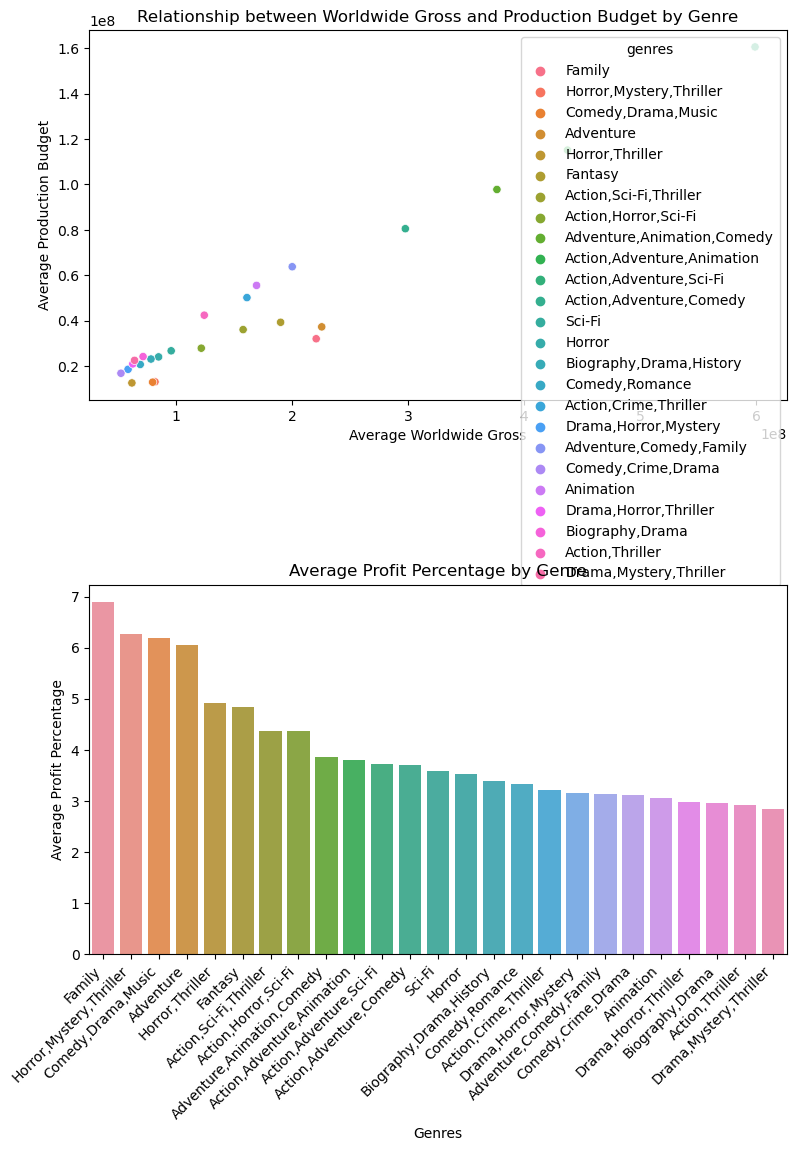

In [23]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

# Scatter plot
sns.scatterplot(x='average_worldwide_gross', y='average_production_budget', hue='genres', markers='genres', data=genre_profit, ax=ax1)
ax1.set_xlabel('Average Worldwide Gross')
ax1.set_ylabel('Average Production Budget')
ax1.set_title('Relationship between Worldwide Gross and Production Budget by Genre')

# Bar graph
sns.barplot(x='genres', y='average_profit_perc', data=genre_profit, ax=ax2)
ax2.set_xlabel('Genres')
ax2.set_ylabel('Average Profit Percentage')
ax2.set_title('Average Profit Percentage by Genre')

# Rotate the x-axis labels for better readability in the bar graph
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Show the plots
plt.show()

In [24]:
top_genres = pd.read_sql("""

SELECT 
    CASE 
        WHEN genres LIKE '%Action%' THEN 'Action'
        WHEN genres LIKE '%Adventure%' THEN 'Adventure'
        WHEN genres LIKE '%Horror%' THEN 'Horror'
        WHEN genres LIKE '%Family%' THEN 'Family'
        WHEN genres LIKE '%Comedy%' THEN 'Comedy'
        WHEN genres LIKE '%Animation%' THEN 'Animation'
        WHEN genres LIKE '%Thriller%' THEN 'Thriller'
        WHEN genres LIKE '%Sci-Fi%' THEN 'Sci-Fi'
        WHEN genres LIKE '%Fantasy%' THEN 'Fantasy'
        WHEN genres LIKE '%Drama%' THEN 'Drama'
        WHEN genres LIKE '%Mystery%' THEN 'Mystery'
        
        ELSE 'Other'
    END AS genres_sorted,
    SUM(CASE WHEN genres LIKE '%Action%' OR genres LIKE '%Adventure%' OR genres LIKE '%Horror%'  OR genres LIKE '%Family%'
                                     OR genres LIKE '%Comedy%' OR genres LIKE '%Animation%' OR genres LIKE '%Thriller%' OR genres LIKE '%Sci-Fi%' 
                                     OR genres LIKE '%Fantasy%' OR genres LIKE '%Drama%' OR genres LIKE '%Mystery%'
                                     THEN 1 ELSE 0 END) AS count,
     average_worldwide_gross,
     average_production_budget,
     average_profit_perc
FROM (SELECT m.genres,
                COUNT(m.genres) AS genre_count,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) AS average_worldwide_gross,
                AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_production_budget,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_profit_perc
FROM movie_basics AS m
JOIN tn_movie_budgets AS t
        ON m.primary_title = t.movie
GROUP BY genres

ORDER BY average_profit_perc DESC)
GROUP BY genres_sorted
ORDER BY average_profit_perc DESC;

""", conn)
top_genres

genres_sorted  count  average_worldwide_gross  average_production_budget  \
0         Family     28             9.246274e+07                  3244000.0   
1         Horror     34             9.512734e+07                  3500000.0   
2       Thriller     23             3.516201e+08                 18000000.0   
3        Fantasy     11             1.086101e+08                  6530000.0   
4      Adventure     48             1.293142e+07                  1000000.0   
5         Action     77             1.716858e+08                 20000000.0   
6      Animation      7             4.182407e+07                  5000000.0   
7          Other      0             8.115822e+07                 10562500.0   
8         Comedy     40             2.938152e+08                 40100000.0   
9          Drama     42             4.370000e+07                  6000000.0   
10        Sci-Fi      6             9.557894e+07                 26703500.0   
11       Mystery      2             2.339394e+07                  7000000.0   

    average_profit_perc  
0             28.502695  
1             27.179241  
2             19.534452  
3             16.632484  
4             12.931420  
5              8.584290  
6              8.364813  
7              7.683618  
8              7.327061  
9              7.283333  
10             3.579266  
11             3.341991

/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

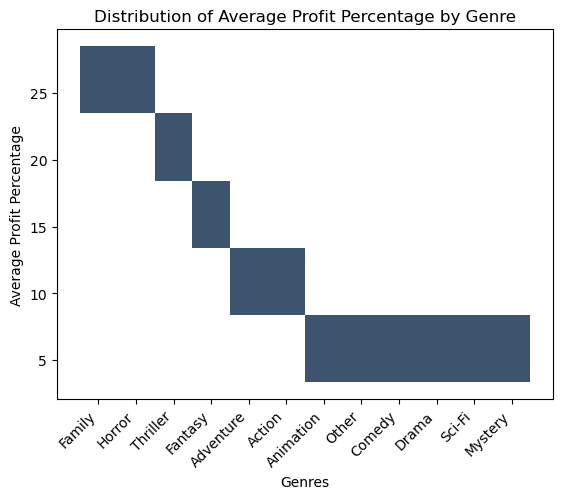

In [25]:
# Create the histogram
sns.histplot(data=top_genres, x = 'genres_sorted', y ='average_profit_perc')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Average Profit Percentage')
plt.title('Distribution of Average Profit Percentage by Genre')
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()

/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ry/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

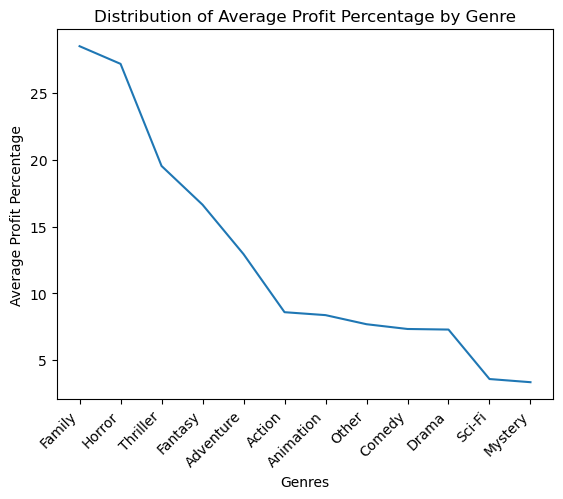

In [26]:
# Create the line graph
sns.lineplot(data=top_genres, x='genres_sorted', y='average_profit_perc')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Average Profit Percentage')
plt.title('Distribution of Average Profit Percentage by Genre')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

We found that the top genres based on average profit percentage are family, horror and thriller.

### Industry Profitiablilty and Budget by Year

grouping by year and looking at some profitability metrics

In [59]:
pd.read_sql("""

SELECT *
FROM movie_basics

""", conn)

movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2                        The Other Side of the Wind        2018   
3                                   Sabse Bada Sukh        2018   
4                             La Telenovela Errante        2017   
...                                             ...         ...   
146139                          Kuambil Lagi Hatiku        2019   
146140  Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
146141                              Dankyavar Danka        2013   
146142                                       6 Gunn        2017   
146143               Chico Albuquerque - Revelações        2013   

        runtime_minutes                genres  
0                 175.0    Action,Crime,Drama  
1                 114.0       Biography,Drama  
2                 122.0                 Drama  
3                   NaN          Comedy,Drama  
4                  80.0  Comedy,Drama,Fantasy  
...                 ...                   ...  
146139            123.0                 Drama  
146140              NaN           Documentary  
146141              NaN                Comedy  
146142            116.0                  None  
146143              NaN           Documentary  

[146144 rows x 6 columns]

In [31]:
pd.read_sql("""

SELECT *
FROM box_office_mojo

""", conn)

index                                              title        studio  \
0         0                                        Toy Story 3            BV   
1         1                         Alice in Wonderland (2010)            BV   
2         2        Harry Potter and the Deathly Hallows Part 1            WB   
3         3                                          Inception            WB   
4         4                                Shrek Forever After          P/DW   
...     ...                                                ...           ...   
2002   3275                                    I Still See You           LGF   
2003   3286                              The Catcher Was a Spy           IFC   
2004   3309                                         Time Freak    Grindstone   
2005   3342  Reign of Judges: Title of Liberty - Concept Short  Darin Southa   
2006   3353            Antonio Lopez 1970: Sex Fashion & Disco            FM   

      domestic_gross foreign_gross  year  
0        415000000.0     652000000  2010  
1        334200000.0     691300000  2010  
2        296000000.0     664300000  2010  
3        292600000.0     535700000  2010  
4        238700000.0     513900000  2010  
...              ...           ...   ...  
2002          1400.0       1500000  2018  
2003        725000.0        229000  2018  
2004         10000.0        256000  2018  
2005         93200.0          5200  2018  
2006         43200.0         30000  2018  

[2007 rows x 6 columns]

In [33]:
box_office_mojo_groupby_year = pd.read_sql("""

SELECT year, 
        SUM(domestic_gross) AS total_domestic_gross, 
        SUM(foreign_gross) AS total_foreign_gross
FROM box_office_mojo
GROUP BY year

""", conn)

box_office_mojo_groupby_year

year  total_domestic_gross  total_foreign_gross
0  2010          1.015274e+10         1.436937e+10
1  2011          9.915690e+09         1.566287e+10
2  2012          1.069786e+10         1.700298e+10
3  2013          1.055885e+10         1.658024e+10
4  2014          1.014798e+10         1.695667e+10
5  2015          1.074487e+10         1.515435e+10
6  2016          1.086969e+10         1.898139e+10
7  2017          1.051677e+10         1.992893e+10
8  2018          1.076436e+10         1.747449e+10

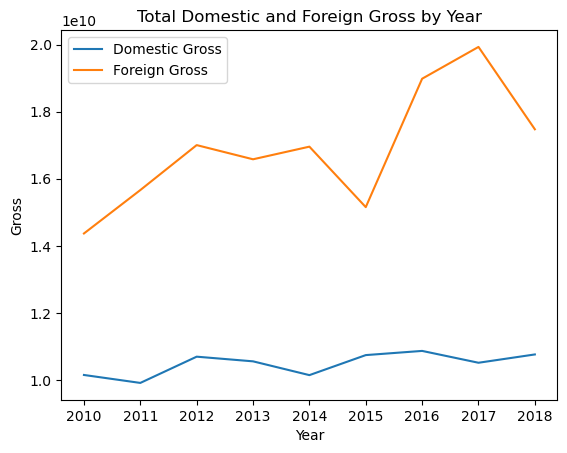

In [34]:
# Plot the data as a line graph
plt.plot(box_office_mojo_groupby_year['year'], box_office_mojo_groupby_year['total_domestic_gross'], label='Domestic Gross')
plt.plot(box_office_mojo_groupby_year['year'], box_office_mojo_groupby_year['total_foreign_gross'], label='Foreign Gross')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Gross')
plt.title('Total Domestic and Foreign Gross by Year')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [61]:
movie_basics_groupby_year = pd.read_sql("""

SELECT m.start_year,
                COUNT(m.genres) AS genre_count,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) AS average_worldwide_gross,
                AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_production_budget,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_profit_perc
FROM movie_basics AS m
JOIN tn_movie_budgets AS t
        ON m.primary_title = t.movie
GROUP BY m.start_year

""", conn)

movie_basics_groupby_year

start_year  genre_count  average_worldwide_gross  \
0         2010          352             9.266885e+07   
1         2011          393             9.568334e+07   
2         2012          378             9.840677e+07   
3         2013          395             9.066837e+07   
4         2014          458             8.635058e+07   
5         2015          457             7.426570e+07   
6         2016          394             1.010288e+08   
7         2017          367             1.044480e+08   
8         2018          343             1.228439e+08   
9         2019          185             7.307353e+07   
10        2020           15             3.829639e+07   
11        2021            6             1.727129e+08   

    average_production_budget  average_profit_perc  
0                3.296624e+07             2.811023  
1                3.417800e+07             2.799559  
2                3.355199e+07             2.932963  
3                3.255225e+07             2.785318  
4                2.858423e+07             3.020917  
5                2.731386e+07             2.718975  
6                3.341628e+07             3.023340  
7                3.652808e+07             2.859390  
8                3.663125e+07             3.353528  
9                3.241184e+07             2.254532  
10               3.661250e+07             1.045992  
11               2.886487e+07             5.983497

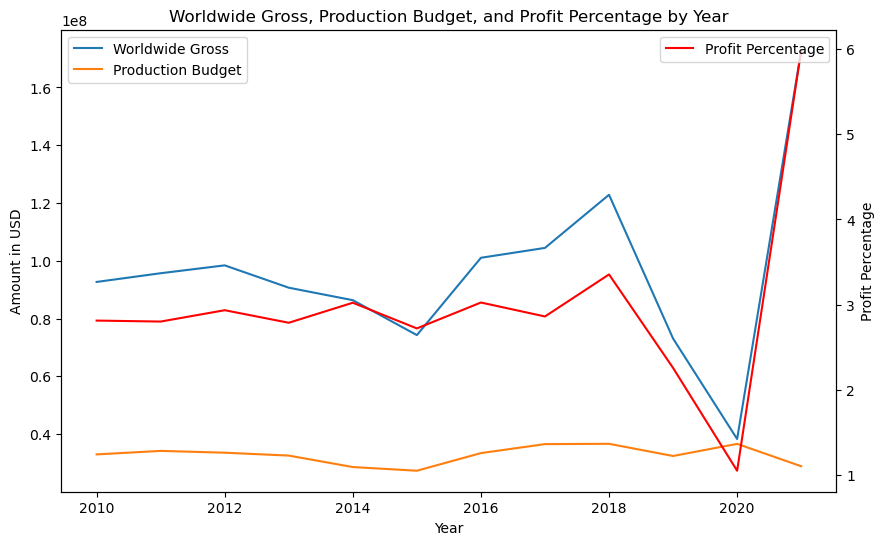

In [63]:
df = movie_basics_groupby_year

# Set the figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the worldwide gross and production budget on the first y-axis
ax1.plot(df['start_year'], df['average_worldwide_gross'], label='Worldwide Gross')
ax1.plot(df['start_year'], df['average_production_budget'], label='Production Budget')
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount in USD')

# Create a secondary y-axis for profit percentage
ax2 = ax1.twinx()
ax2.plot(df['start_year'], df['average_profit_perc'], color='red', label='Profit Percentage')
ax2.set_ylabel('Profit Percentage')

# Set the title
plt.title('Worldwide Gross, Production Budget, and Profit Percentage by Year')

# Add legends for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

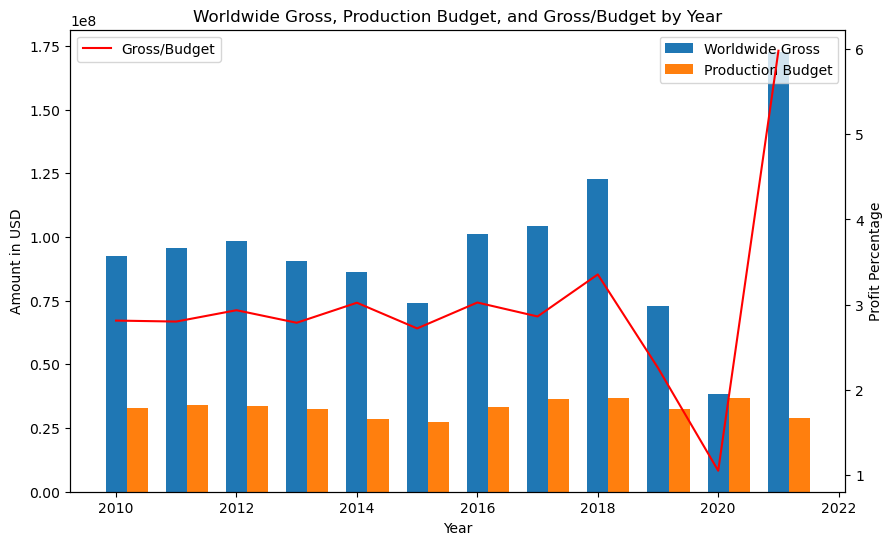

In [65]:
df = movie_basics_groupby_year

# Set the figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the worldwide gross and production budget as side-by-side bars
bar_width = 0.35
year = df['start_year']
gross = df['average_worldwide_gross']
budget = df['average_production_budget']

ax1.bar(year, gross, width=bar_width, label='Worldwide Gross')
ax1.bar(year + bar_width, budget, width=bar_width, label='Production Budget')

# Create a secondary y-axis for profit percentage
ax2 = ax1.twinx()
ax2.plot(year, df['average_profit_perc'], color='red', label='Gross/Budget')

# Set the labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount in USD')
ax2.set_ylabel('Profit Percentage')
plt.title('Worldwide Gross, Production Budget, and Gross/Budget by Year')

# Calculate the position for the legend
line_legend = ax2.legend(loc='upper left')
bar_legend = ax1.legend(loc='upper right')
ax1.add_artist(line_legend)

# Set the x-axis tick labels
ax1.set_xticks(year)
ax1.set_xticklabels(year, rotation=45)

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()

# Display the plot
plt.show()

In [54]:
pd.read_sql("""

SELECT *
FROM tn_movie_budgets AS t
JOIN movie_basics AS m
    ON t.movie = m.primary_title
    

""", conn)



index  id  release_date                                        movie  \
0         0   1  Dec 18, 2009                                       Avatar   
1         1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2         2   3   Jun 7, 2019                                 Dark Phoenix   
3         3   4   May 1, 2015                      Avengers: Age of Ultron   
4         6   7  Apr 27, 2018                       Avengers: Infinity War   
...     ...  ..           ...                                          ...   
3810   5767  68   Jul 6, 2001                                         Cure   
3811   5769  70   Apr 1, 1996                                         Bang   
3812   5772  73  Jan 13, 2012                                    Newlyweds   
3813   5777  78  Dec 31, 2018                                       Red 11   
3814   5780  81  Sep 29, 2015                         A Plague So Pleasant   

     production_budget domestic_gross worldwide_gross   movie_id  \
0         $425,000,000   $760,507,625  $2,776,345,279  tt1775309   
1         $410,600,000   $241,063,875  $1,045,663,875  tt1298650   
2         $350,000,000    $42,762,350    $149,762,350  tt6565702   
3         $330,600,000   $459,005,868  $1,403,013,963  tt2395427   
4         $300,000,000   $678,815,482  $2,048,134,200  tt4154756   
...                ...            ...             ...        ...   
3810           $10,000        $94,596         $94,596  tt5936960   
3811           $10,000           $527            $527  tt6616538   
3812            $9,000         $4,584          $4,584  tt1880418   
3813            $7,000             $0              $0  tt7837402   
3814            $1,400             $0              $0  tt2107644   

                                    primary_title  \
0                                          Avatar   
1     Pirates of the Caribbean: On Stranger Tides   
2                                    Dark Phoenix   
3                         Avengers: Age of Ultron   
4                          Avengers: Infinity War   
...                                           ...   
3810                                         Cure   
3811                                         Bang   
3812                                    Newlyweds   
3813                                       Red 11   
3814                         A Plague So Pleasant   

                                   original_title  start_year  \
0                                           Abatâ        2011   
1     Pirates of the Caribbean: On Stranger Tides        2011   
2                                    Dark Phoenix        2019   
3                         Avengers: Age of Ultron        2015   
4                          Avengers: Infinity War        2018   
...                                           ...         ...   
3810                                         Cure        2014   
3811                                         Bang        2015   
3812                                    Newlyweds        2011   
3813                                       Red 11        2019   
3814                         A Plague So Pleasant        2013   

      runtime_minutes                    genres  
0                93.0                    Horror  
1               136.0  Action,Adventure,Fantasy  
2               113.0   Action,Adventure,Sci-Fi  
3               141.0   Action,Adventure,Sci-Fi  
4               149.0   Action,Adventure,Sci-Fi  
...               ...                       ...  
3810              NaN                      None  
3811              NaN                      None  
3812             95.0              Comedy,Drama  
3813             77.0    Horror,Sci-Fi,Thriller  
3814             76.0     Drama,Horror,Thriller  

[3815 rows x 13 columns]

In [42]:
tn_movie_budgets_df = pd.read_sql("""

SELECT *
FROM tn_movie_budgets

""", conn)

tn_movie_budgets_df

index  id  release_date                                        movie  \
0         0   1  Dec 18, 2009                                       Avatar   
1         1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2         2   3   Jun 7, 2019                                 Dark Phoenix   
3         3   4   May 1, 2015                      Avengers: Age of Ultron   
4         4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...     ...  ..           ...                                          ...   
5777   5777  78  Dec 31, 2018                                       Red 11   
5778   5778  79   Apr 2, 1999                                    Following   
5779   5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780   5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781   5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,875  $1,045,663,875  
2         $350,000,000    $42,762,350    $149,762,350  
3         $330,600,000   $459,005,868  $1,403,013,963  
4         $317,000,000   $620,181,382  $1,316,721,747  
...                ...            ...             ...  
5777            $7,000             $0              $0  
5778            $6,000        $48,482        $240,495  
5779            $5,000         $1,338          $1,338  
5780            $1,400             $0              $0  
5781            $1,100       $181,041        $181,041  

[5782 rows x 7 columns]

In [44]:
# Convert the 'release_date' column to a datetime format
tn_movie_budgets_df['release_date'] = pd.to_datetime(tn_movie_budgets_df['release_date'])

# Extract the year from the 'release_date' column
tn_movie_budgets_df['year'] = tn_movie_budgets_df['release_date'].dt.year

# Print the resulting DataFrame with the extracted year
tn_movie_budgets_df

index  id release_date                                        movie  \
0         0   1   2009-12-18                                       Avatar   
1         1   2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2         2   3   2019-06-07                                 Dark Phoenix   
3         3   4   2015-05-01                      Avengers: Age of Ultron   
4         4   5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...     ...  ..          ...                                          ...   
5777   5777  78   2018-12-31                                       Red 11   
5778   5778  79   1999-04-02                                    Following   
5779   5779  80   2005-07-13                Return to the Land of Wonders   
5780   5780  81   2015-09-29                         A Plague So Pleasant   
5781   5781  82   2005-08-05                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  year  
0         $425,000,000   $760,507,625  $2,776,345,279  2009  
1         $410,600,000   $241,063,875  $1,045,663,875  2011  
2         $350,000,000    $42,762,350    $149,762,350  2019  
3         $330,600,000   $459,005,868  $1,403,013,963  2015  
4         $317,000,000   $620,181,382  $1,316,721,747  2017  
...                ...            ...             ...   ...  
5777            $7,000             $0              $0  2018  
5778            $6,000        $48,482        $240,495  1999  
5779            $5,000         $1,338          $1,338  2005  
5780            $1,400             $0              $0  2015  
5781            $1,100       $181,041        $181,041  2005  

[5782 rows x 8 columns]

In [50]:
grouped_tn_movie_budgets_df


domestic_gross  \
year                                                      
1915                                        $10,000,000   
1916                                       $0$8,000,000   
1920                                         $3,000,000   
1925                              $9,000,000$11,000,000   
1927                                                 $0   
...                                                 ...   
2016  $408,084,349$330,360,194$532,177,324$486,295,5...   
2017  $620,181,382$229,024,295$225,764,765$172,558,8...   
2018  $678,815,482$213,767,512$700,059,566$608,581,7...   
2019  $42,762,350$246,734,314$426,525,952$113,883,31...   
2020                                             $0$0$0   

                                        worldwide_gross  
year                                                     
1915                                        $11,000,000  
1916                                       $0$8,000,000  
1920                                         $3,000,000  
1925                              $9,000,000$22,000,000  
1927                                                 $0  
...                                                 ...  
2016  $1,140,069,413$867,500,281$1,049,102,856$1,021...  
2017  $1,316,721,747$655,945,209$1,234,846,267$788,2...  
2018  $2,048,134,200$393,151,347$1,348,258,224$1,242...  
2019  $149,762,350$619,234,314$1,123,061,550$345,004...  
2020                                             $0$0$0  

[96 rows x 2 columns]

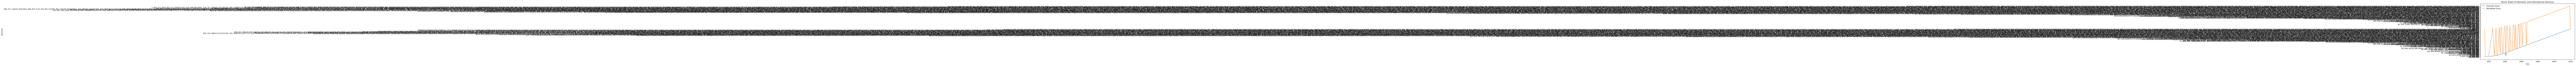

In [49]:
# Group the data by year and calculate the yearly totals of domestic and international revenue
grouped_tn_movie_budgets_df = tn_movie_budgets_df.groupby('year').agg({'domestic_gross': 'sum', 'worldwide_gross': 'sum'})

plt.figure(figsize=(10, 6))

# Plot the data as a line graph
plt.plot(grouped_tn_movie_budgets_df.index, grouped_tn_movie_budgets_df['domestic_gross'], label='Domestic Gross')
plt.plot(grouped_tn_movie_budgets_df.index, grouped_tn_movie_budgets_df['worldwide_gross'], label='Worldwide Gross')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Yearly Totals of Domestic and International Revenue')

# Add a legend
plt.legend()

# Display the plot
plt.show()

### Profit by Month

group profit and budget totals by Month and graph


In [104]:
# Execute the SQL query and retrieve the results into a DataFrame
movie_basics_groupby_month = pd.read_sql("""
    SELECT substr(t.release_date, 1, 3) AS month,
        AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) AS average_worldwide_gross,
        AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_production_budget,
        AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_profit_perc
    FROM tn_movie_budgets AS t
    GROUP BY month
    ORDER BY CASE month
        WHEN 'Jan' THEN 1
        WHEN 'Feb' THEN 2
        WHEN 'Mar' THEN 3
        WHEN 'Apr' THEN 4
        WHEN 'May' THEN 5
        WHEN 'Jun' THEN 6
        WHEN 'Jul' THEN 7
        WHEN 'Aug' THEN 8
        WHEN 'Sep' THEN 9
        WHEN 'Oct' THEN 10        WHEN 'Nov' THEN 11
        WHEN 'Dec' THEN 12
        ELSE 999
    END;
""", conn)

movie_basics_groupby_month

month  average_worldwide_gross  average_production_budget  \
0    Jan             4.656382e+07               2.084349e+07   
1    Feb             7.154453e+07               2.804642e+07   
2    Mar             8.063337e+07               3.078208e+07   
3    Apr             5.992026e+07               2.380283e+07   
4    May             1.622680e+08               4.713520e+07   
5    Jun             1.425230e+08               4.309912e+07   
6    Jul             1.409636e+08               4.254616e+07   
7    Aug             6.097841e+07               2.555609e+07   
8    Sep             4.669369e+07               2.181290e+07   
9    Oct             4.946456e+07               2.039266e+07   
10   Nov             1.357416e+08               4.260006e+07   
11   Dec             1.016932e+08               3.325161e+07   

    average_profit_perc  
0              2.233974  
1              2.550933  
2              2.619491  
3              2.517359  
4              3.442608  
5              3.306866  
6              3.313193  
7              2.386061  
8              2.140645  
9              2.425606  
10             3.186419  
11             3.058294

ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

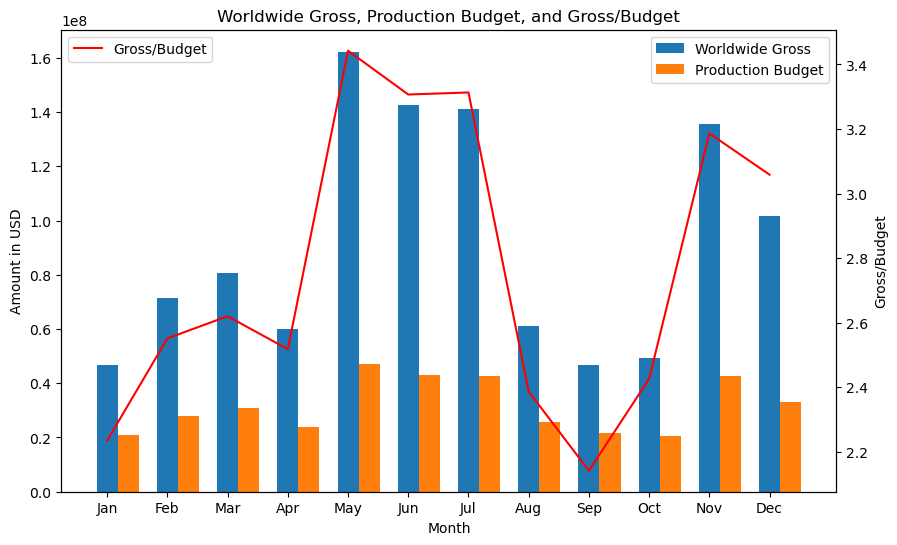

In [105]:
import numpy as np
df = movie_basics_groupby_month

# Set the figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the worldwide gross and production budget as side-by-side bars
bar_width = 0.35
month = np.arange(len(df['month']))
gross = df['average_worldwide_gross']
budget = df['average_production_budget']

ax1.bar(month, gross, width=bar_width, label='Worldwide Gross')
ax1.bar(month + bar_width, budget, width=bar_width, label='Production Budget')

# Create a secondary y-axis for profit percentage
ax2 = ax1.twinx()
ax2.plot(month, df['average_profit_perc'], color='red', label='Gross/Budget')

# Set the labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Amount in USD')
ax2.set_ylabel('Gross/Budget')
plt.title('Worldwide Gross, Production Budget, and Gross/Budget')

# Set the x-axis tick labels
ax1.set_xticks(month)
ax1.set_xticklabels(df['month'])

# Calculate the position for the legend
line_legend = ax2.legend(loc='upper left')
bar_legend = ax1.legend(loc='upper right')
ax1.add_artist(line_legend)

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()

# Display the plot
plt.show()

It appears that worldwide movie Gross Revenue surges twice during the year: May-June-Jul and Nov-Dec, 
corresponding to the early summer months and the holiday season

### Profit by Month of Year, only for movies with "Family" as one of the genres

In [106]:
# Execute the SQL query and retrieve the results into a DataFrame
movie_basics_groupby_month_family = pd.read_sql("""
    SELECT substr(t.release_date, 1, 3) AS month,
        AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) AS average_worldwide_gross,
        AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_production_budget,
        AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_profit_perc
    FROM tn_movie_budgets AS t
    JOIN movie_basics AS m
        ON t.movie = m.primary_title
    WHERE m.genres LIKE '%Family%'
    GROUP BY month
    ORDER BY CASE month
        WHEN 'Jan' THEN 1
        WHEN 'Feb' THEN 2
        WHEN 'Mar' THEN 3
        WHEN 'Apr' THEN 4
        WHEN 'May' THEN 5
        WHEN 'Jun' THEN 6
        WHEN 'Jul' THEN 7
        WHEN 'Aug' THEN 8
        WHEN 'Sep' THEN 9
        WHEN 'Oct' THEN 10        WHEN 'Nov' THEN 11
        WHEN 'Dec' THEN 12
        ELSE 999
    END;
""", conn)

movie_basics_groupby_month_family

month  average_worldwide_gross  average_production_budget  \
0    Jan             6.016560e+07               3.777778e+07   
1    Feb             7.584884e+07               2.944785e+07   
2    Mar             2.878402e+08               7.656464e+07   
3    Apr             7.142240e+07               2.055714e+07   
4    May             2.894731e+08               1.043818e+08   
5    Jun             1.630996e+08               4.335714e+07   
6    Jul             1.321625e+08               5.318750e+07   
7    Aug             3.647679e+07               1.802500e+07   
8    Sep             1.206408e+08               4.103333e+07   
9    Oct             5.496249e+07               2.908250e+07   
10   Nov             2.339154e+08               5.886316e+07   
11   Dec             1.937831e+08               4.526994e+07   

    average_profit_perc  
0              1.592619  
1              2.575700  
2              3.759440  
3              3.474335  
4              2.773214  
5              3.761769  
6              2.484841  
7              2.023678  
8              2.940069  
9              1.889882  
10             3.973885  
11             4.280612

ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

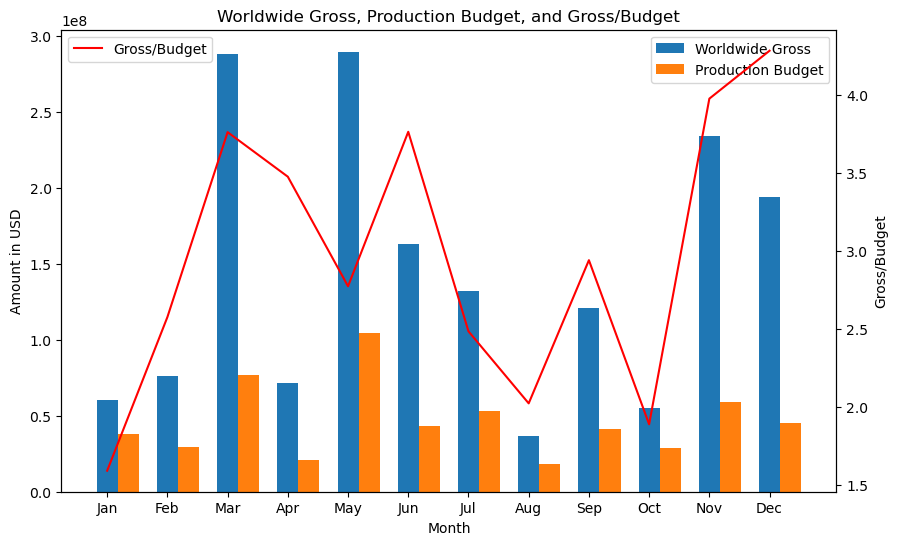

In [108]:
import numpy as np
df = movie_basics_groupby_month_family

# Set the figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the worldwide gross and production budget as side-by-side bars
bar_width = 0.35
month = np.arange(len(df['month']))
gross = df['average_worldwide_gross']
budget = df['average_production_budget']

ax1.bar(month, gross, width=bar_width, label='Worldwide Gross')
ax1.bar(month + bar_width, budget, width=bar_width, label='Production Budget')

# Create a secondary y-axis for profit percentage
ax2 = ax1.twinx()
ax2.plot(month, df['average_profit_perc'], color='red', label='Gross/Budget')

# Set the labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Amount in USD')
ax2.set_ylabel('Gross/Budget')
plt.title('Worldwide Gross, Production Budget, and Gross/Budget')

# Set the x-axis tick labels
ax1.set_xticks(month)
ax1.set_xticklabels(df['month'])

# Calculate the position for the legend
line_legend = ax2.legend(loc='upper left')
bar_legend = ax1.legend(loc='upper right')
ax1.add_artist(line_legend)

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()

# Display the plot
plt.show()

### Histogram: distribution of Movie runtimes



In [98]:
df = pd.read_sql("""

SELECT runtime_minutes,
        (CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) AS worldwide_gross,
        (CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS production_budget,
        (CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / (CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS profit_perc
    FROM tn_movie_budgets AS t
    JOIN movie_basics AS m
        ON t.movie = m.primary_title

""", conn)

df

runtime_minutes  worldwide_gross  production_budget  profit_perc
0                93.0       2776345279          425000000            6
1               136.0       1045663875          410600000            2
2               113.0        149762350          350000000            0
3               141.0       1403013963          330600000            4
4               149.0       2048134200          300000000            6
...               ...              ...                ...          ...
3810             93.0            94596              10000            9
3811              NaN              527              10000            0
3812             95.0             4584               9000            0
3813             77.0                0               7000            0
3814             76.0                0               1400            0

[3815 rows x 4 columns]

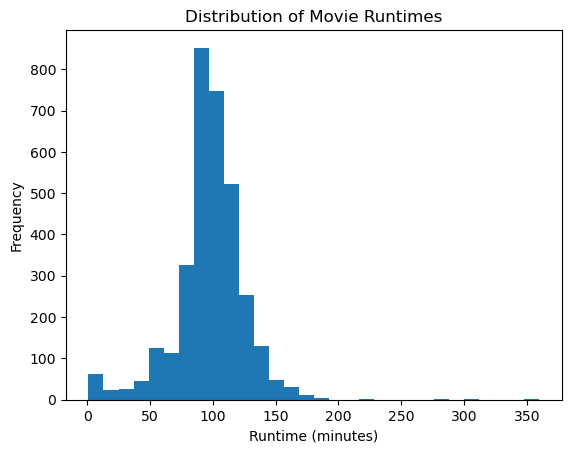

In [102]:
# Create a histogram
plt.hist(df['runtime_minutes'], bins=30)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.show()

### Gross Revenue by Runtime

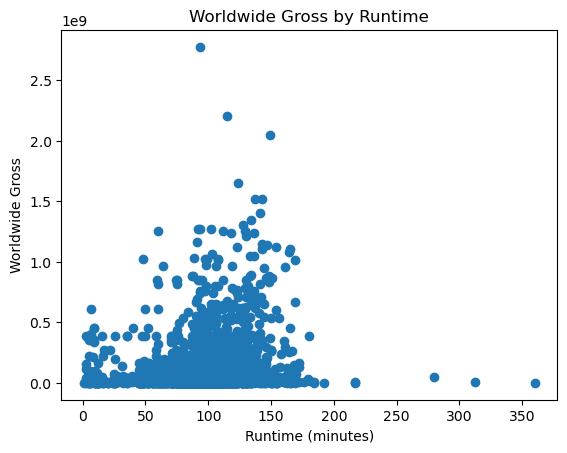

In [103]:
# Create a scatter plot
plt.scatter(df['runtime_minutes'], df['worldwide_gross'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross by Runtime')
plt.show()